In [1]:
import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [2]:
#Importing required module
import numpy as np
from nltk.tokenize import  word_tokenize 
from sklearn.datasets import fetch_20newsgroups
ctg=['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 ]
df=fetch_20newsgroups(subset='all', categories=ctg,shuffle=False, random_state=42, remove=('headers', 'footers', 'quotes'))
text=df.data

In [3]:
labels=df.target 
true_k = len(np.unique(labels))
true_k

5

In [4]:
len(text)

4702

In [5]:
df.target.shape

(4702,)

In [6]:
df.target[:50]

array([4, 4, 0, 4, 2, 2, 2, 1, 4, 0, 3, 0, 2, 4, 0, 4, 2, 2, 4, 2, 2, 2,
       1, 2, 1, 0, 4, 2, 2, 3, 1, 0, 0, 3, 2, 2, 4, 0, 2, 1, 2, 2, 2, 3,
       2, 1, 4, 4, 0, 4])

In [7]:
text[0]

'Well, I just got my Centris 610 yesterday.  It took just over two \nweeks from placing the order.  The dealer (Rutgers computer store) \nappologized because Apple made a substitution on my order.  I ordered\nthe one without ethernet, but they substituted one _with_ ethernet.\nHe wanted to know if that would be "alright with me"!!!  They must\nbe backlogged on Centri w/out ethernet so they\'re just shipping them\nwith!  \n\n\tAnyway, I\'m very happy with the 610 with a few exceptions.  \nBeing nosy, I decided to open it up _before_ powering it on for the first\ntime.  The SCSI cable to the hard drive was only partially connected\n(must have come loose in shipping).  No big deal, but I would have been\npissed if I tried to boot it and it wouldn\'t come up!\n\tThe hard drive also has an annoying high pitched whine.  I\'ve\nheard apple will exchange it if you complain, so I might try to get\nit swapped.\n\tI am also dissappionted by the lack of soft power-on/off.  This\nwasn\'t mentioned 

In [8]:
def data_cleaning(data):
  data=str(data)
  data = re.sub('[^\w]|_', ' ', data)  # only keeping numbers and letters and spaces
  data = re.sub(r'[^\x00-\x7f]',r'', data)  # removing non ascii texts
  data=data.lower()
  return data

In [9]:
import re
t1=data_cleaning(text)
t1

'  well  i just got my centris 610 yesterday   it took just over two  nweeks from placing the order   the dealer  rutgers computer store   nappologized because apple made a substitution on my order   i ordered nthe one without ethernet  but they substituted one  with  ethernet  nhe wanted to know if that would be  alright with me      they must nbe backlogged on centri w out ethernet so they  re just shipping them nwith    n n tanyway  i  m very happy with the 610 with a few exceptions    nbeing nosy  i decided to open it up  before  powering it on for the first ntime   the scsi cable to the hard drive was only partially connected n must have come loose in shipping    no big deal  but i would have been npissed if i tried to boot it and it wouldn  t come up  n tthe hard drive also has an annoying high pitched whine   i  ve nheard apple will exchange it if you complain  so i might try to get nit swapped  n ti am also dissappionted by the lack of soft power on off   this nwasn  t mentione

In [10]:
'''List of Stop Words'''
#stop_words=set(stopwords.words('english')) # builtin method to get sop words
stop_words = ['a','about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', "aren't", 'as', 'at',
      'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by',
      'can', "can't", 'cannot', 'could', "couldn't", 'did', "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during',
      'each', 'few', 'for', 'from', 'further',
      'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having', 'he', "he'd", "he'll", "he's", 'her', 'here', "here's",
      'hers', 'herself', 'him', 'himself', 'his', 'how', "how's",
      'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it', "it's", 'its', 'itself',
      "let's", 'me', 'more', 'most', "mustn't", 'my', 'myself',
      'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'ought', 'our', 'ours' 'ourselves', 'out', 'over', 'own',
      'same', "shan't", 'she', "she'd", "she'll", "she's", 'should', "shouldn't", 'so', 'some', 'such',
      'than', 'that',"that's", 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there', "there's", 'these', 'they', "they'd",
      "they'll", "they're", "they've", 'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 'very',
      'was', "wasn't", 'we', "we'd", "we'll", "we're", "we've", 'were', "weren't", 'what', "what's", 'when', "when's", 'where',
      "where's", 'which', 'while', 'who', "who's", 'whom', 'why', "why's",'will', 'with', "won't", 'would', "wouldn't",
      'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves',
      'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'hundred', 'thousand', '1st', '2nd', '3rd',
      '4th', '5th', '6th', '7th', '8th', '9th', '10th']

In [11]:
tokenized_data = word_tokenize(t1)
len(tokenized_data)

1051505

In [12]:
def stop_word_removal(data):
    data=data.split()
    filtered_data=[]
    for word in data:
        if word not in stop_words and len(word)>1: # filtering stop words and single characters in data set
            filtered_data.append(word)
    return filtered_data
t2=stop_word_removal(t1)
print(t2[:100])

['well', 'just', 'got', 'centris', '610', 'yesterday', 'took', 'just', 'nweeks', 'placing', 'order', 'dealer', 'rutgers', 'computer', 'store', 'nappologized', 'apple', 'made', 'substitution', 'order', 'ordered', 'nthe', 'without', 'ethernet', 'substituted', 'ethernet', 'nhe', 'wanted', 'know', 'alright', 'must', 'nbe', 'backlogged', 'centri', 'ethernet', 're', 'just', 'shipping', 'nwith', 'tanyway', 'happy', '610', 'exceptions', 'nbeing', 'nosy', 'decided', 'open', 'powering', 'first', 'ntime', 'scsi', 'cable', 'hard', 'drive', 'partially', 'connected', 'must', 'come', 'loose', 'shipping', 'big', 'deal', 'npissed', 'tried', 'boot', 'wouldn', 'come', 'tthe', 'hard', 'drive', 'also', 'annoying', 'high', 'pitched', 'whine', 've', 'nheard', 'apple', 'exchange', 'complain', 'might', 'try', 'get', 'nit', 'swapped', 'ti', 'also', 'dissappionted', 'lack', 'soft', 'power', 'nwasn', 'mentioned', 'literature', 'saw', 'also', 'location', 'nof', 'reset', 'interupt']


In [13]:
#Applying Stemming on each word
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer
porter_stemmer=PorterStemmer()
for i in range(len(t2)):
    t2[i]=porter_stemmer.stem(t2[i])
t2[:20]

['well',
 'just',
 'got',
 'centri',
 '610',
 'yesterday',
 'took',
 'just',
 'nweek',
 'place',
 'order',
 'dealer',
 'rutger',
 'comput',
 'store',
 'nappolog',
 'appl',
 'made',
 'substitut',
 'order']

In [14]:
#Preprocessing the text data
sentences = []
word_set = []

for sent in text:
    x = [i.lower() for  i in word_tokenize(sent) if i.isalpha()]
    sentences.append(x)
    for word in x:
        if word not in word_set:
            word_set.append(word)
 
#Set of vocab 
word_set = set(word_set)
#Total documents in our corpus
total_documents = len(sentences)
 
#Creating an index for each word in our vocab.
index_dict = {} #Dictionary to store index for each word
i = 0
for word in word_set:
    index_dict[word] = i
    i += 1


In [15]:
print(sentences[0])

['well', 'i', 'just', 'got', 'my', 'centris', 'yesterday', 'it', 'took', 'just', 'over', 'two', 'weeks', 'from', 'placing', 'the', 'order', 'the', 'dealer', 'rutgers', 'computer', 'store', 'appologized', 'because', 'apple', 'made', 'a', 'substitution', 'on', 'my', 'order', 'i', 'ordered', 'the', 'one', 'without', 'ethernet', 'but', 'they', 'substituted', 'one', 'ethernet', 'he', 'wanted', 'to', 'know', 'if', 'that', 'would', 'be', 'alright', 'with', 'me', 'they', 'must', 'be', 'backlogged', 'on', 'centri', 'ethernet', 'so', 'they', 'just', 'shipping', 'them', 'with', 'anyway', 'i', 'very', 'happy', 'with', 'the', 'with', 'a', 'few', 'exceptions', 'being', 'nosy', 'i', 'decided', 'to', 'open', 'it', 'up', 'powering', 'it', 'on', 'for', 'the', 'first', 'time', 'the', 'scsi', 'cable', 'to', 'the', 'hard', 'drive', 'was', 'only', 'partially', 'connected', 'must', 'have', 'come', 'loose', 'in', 'shipping', 'no', 'big', 'deal', 'but', 'i', 'would', 'have', 'been', 'pissed', 'if', 'i', 'tried

In [16]:
#Create a count dictionary
 
def count_dict(sentences):
    word_count = {}
    for word in word_set:
        word_count[word] = 0
        for sent in sentences:
            if word in sent:
                word_count[word] += 1
    return word_count
 
word_count = count_dict(sentences)

In [17]:
#Term Frequency
def termfreq(document, word):
    N = len(document)
    occurance = len([token for token in document if token == word])
    return occurance/N

In [18]:
#Inverse Document Frequency
 
def inverse_doc_freq(word):
    try:
        word_occurance = word_count[word] + 1
    except:
        word_occurance = 1
    return np.log(total_documents/word_occurance)

In [19]:
#Calculating Fuzzy Values
def fuzzy(word):
  try:
      word_occurance = word_count[word] + 1
  except:
      word_occurance = 1
  return (word_occurance/total_documents)
  

In [20]:
# Multiplying Tf_Idef values to Fuzzy Values
def tf_idf_fuzzy(sentence):
    tf_idf_vec = np.zeros((len(word_set),))
    for word in sentence:
        tf = termfreq(sentence,word)
        idf = inverse_doc_freq(word)
        fz= fuzzy(word)
        value = (tf*idf)*fz
        tf_idf_vec[index_dict[word]] = value 
    return tf_idf_vec

In [21]:
#TF-IDF Encoded text corpus
print(total_documents)
vectors = []
for sent in sentences:
    vec = tf_idf_fuzzy(sent)
    vectors.append(vec)


4702


In [22]:
from scipy import sparse
vector=sparse.csr_matrix(vectors)
vector

<4702x30806 sparse matrix of type '<class 'numpy.float64'>'
	with 350308 stored elements in Compressed Sparse Row format>

In [23]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

import sys

In [24]:
from sklearn.metrics.pairwise import cosine_similarity

def regularized_kmeans(X, k, alpha=1.0, max_iters=100):
    # randomly initialize centroids
    centroids = X[np.random.choice(X.shape[0], size=k, replace=False)]
    n = X.shape[0]
    # initialize assignment matrix
    assignments = np.zeros(n)
    for i in range(max_iters):
        # calculate cosine similarity between X and centroids
        similarities = cosine_similarity(X, centroids)
        # assign points to nearest centroid
        new_assignments = np.argmax(similarities, axis=1)
        # if no points were reassigned, we have converged
        if np.array_equal(assignments, new_assignments):
            break
        assignments = new_assignments
        # update centroids
        for j in range(k):
            # calculate regularizer term
            reg_term = alpha * np.sum(assignments == j) * centroids[j]
            # calculate new centroid
            centroids[j] = (X[assignments == j].sum(axis=0) + reg_term) / (np.sum(assignments == j) + alpha)
    return centroids, assignments


In [25]:
X = np.array(vectors)
cluster_centers, clusters=regularized_kmeans(X,5)

In [27]:
import os
if 'Results' not in os.listdir(os.getcwd()):
    os.mkdir('Results')

In [28]:
F_count = 0
for c,t in zip(clusters, text):
    if 'cluster_{}'.format(c) not in os.listdir('Results'):
        os.mkdir('Results/cluster_{}'.format(c))
    f = open('Results/cluster_{}/{}.txt'.format(c,F_count),'w')
    f.write(t)
    f.close()
    F_count += 1
print("Clusters are created and Stored in Results Directory")

Clusters are created and Stored in Results Directory


In [ ]:
#means=km.cluster_centers_
print("The Cluster Centers are: \n",cluster_centers)

The Cluster Centers are: 
 [[0.00000000e+00 0.00000000e+00 3.51146207e-08 ... 6.15868803e-07
  1.01947214e-06 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 9.91152998e-09]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 5.32192720e-08]
 [1.69177424e-06 3.03109551e-06 5.47358113e-07 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [ ]:
confusion_matrix1=metrics.confusion_matrix(df.target,clusters)
print("Confusion Matrix:\n",confusion_matrix1)

Confusion Matrix:
 [[442  20 105  95 137]
 [263 129 158 209 214]
 [265  72 144 325 179]
 [206  72 129 322 253]
 [246  71 116 275 255]]


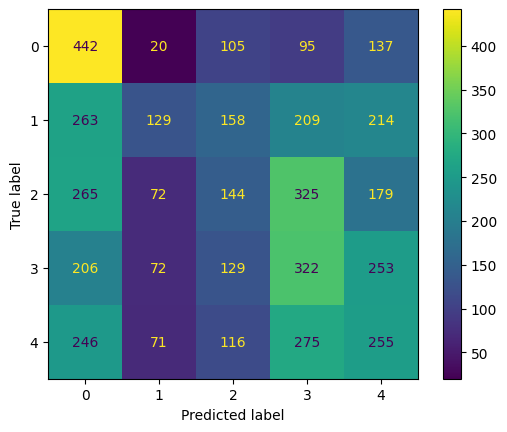

In [ ]:
import matplotlib.pyplot as plt
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix1, display_labels =np.unique(labels))
cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print("Performance Report\n",classification_report(df.target,clusters))

Performance Report
               precision    recall  f1-score   support

           0       0.31      0.55      0.40       799
           1       0.35      0.13      0.19       973
           2       0.22      0.15      0.18       985
           3       0.26      0.33      0.29       982
           4       0.25      0.26      0.25       963

    accuracy                           0.27      4702
   macro avg       0.28      0.28      0.26      4702
weighted avg       0.28      0.27      0.26      4702



In [ ]:
FP = np.sum(confusion_matrix1, axis=0) - np.diag(confusion_matrix1)  
FN = np.sum(confusion_matrix1, axis=1) - np.diag(confusion_matrix1)
TP = np.diag(confusion_matrix1)
TN = np.sum(confusion_matrix1) - (FP + FN + TP)

In [ ]:
print("False Positive Values: ",FP)
print("\nFalse Negative Values: ",FN)
print("\nTrue Positive Values: ",TP)
print("\nTrue Negative Values: ",TN)

False Positive Values:  [980 235 508 904 783]

False Negative Values:  [357 844 841 660 708]

True Positive Values:  [442 129 144 322 255]

True Negative Values:  [2923 3494 3209 2816 2956]


In [ ]:
#Calculating Precision and Recall Using Confusion Matrix
print("Precision and Recall Using Confusion Matrix:\n")
Precision = sum(TP/(TP+FP))/5
print("Precision: %0.3f " %Precision)

Recall = sum(TP/(TP+FN))/5
print("Recall: %0.3f"%Recall)


Precision and Recall Using Confusion Matrix:

Precision: 0.279 
Recall: 0.285


In [ ]:
#Calculating Precision and Recall Using Builtin Functions
print("Precision and Recall  Using Builtin Functions:\n")
Precision=metrics.precision_score(df.target,clusters, average='macro')
print("Precision: %0.3f"%Precision)

Recall=metrics.recall_score(df.target,clusters, average='macro')
print("Recall: %0.3f"%Recall)

Precision and Recall  Using Builtin Functions:

Precision: 0.279
Recall: 0.285


In [ ]:
#Calculating F-Measure Using Precision and Recall Values
print(" F-Measure Using Precision and Recall Values:\n")
F_Measure=2*((Precision*Recall)/(Precision+Recall))
print("F-Measure : %0.3f" %F_Measure)

 F-Measure Using Precision and Recall Values:

F-Measure : 0.282


In [ ]:
#Calculating F-Measure Using BuiltIn f1_score function
print("F-Measure Using BuiltIn f1_score function: \n")
F_Measure = metrics.f1_score(df.target, clusters, average="macro")
print("F-Measure : %0.3f" %F_Measure)

F-Measure Using BuiltIn f1_score function: 

F-Measure : 0.263


In [ ]:
TP=sum(TP)/5
TN=sum(TN)/5
FP=sum(FP)/5
FN=sum(FN)/5

In [ ]:
#Calculating Accuracy Using Confusion Matrix
print("Accuracy Using Confusion Matrix Values: \n")
Accuracy=(TP+TN)/(TP+TN+FP+FN)
print("Accuracy: %0.3f" %Accuracy)

Accuracy Using Confusion Matrix Values: 

Accuracy: 0.710


In [ ]:
#Calculating Accuracy Using BuiltIn Accuracy_Score function
print("Accuracy Using BuiltIn accuracy_score function: \n")
Accuracy=metrics.accuracy_score(df.target,clusters)
print("Accuracy: %0.3f" %Accuracy)

Accuracy Using BuiltIn accuracy_score function: 

Accuracy: 0.275


In [ ]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)
 

In [ ]:
#Purity
print("Purity:%.3f"%purity_score(df.target,clusters))

Purity:0.278
